# Algunas configuraciones iniciales

En primer lugar, vamos a importar algunos módulos comunes, asegurarnos de que MatplotLib traza las figuras en línea y preparar una función para guardar las figuras. 

In [1]:
# Paquetes básicos
import sklearn
import numpy as np
import os

# Establecer una semilla estable para reproducibilidad
np.random.seed(42)

# imprimir buenas figuras
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Clustering

**Diferencias entre – Classificación _vs_ Clustering**

In [2]:
from sklearn.datasets import load_iris

clustering: es la tarea de identificar instancias similares y asignarlas a clusters, o grupos de instancias similares.

* Al igual que en la clasificación, cada instancia se asigna a un grupo. Sin embargo, a diferencia de la clasificación, el clustering es una tarea no supervisada. Consideremos la Figura siguiente: a la izquierda está el conjunto de datos del iris, donde la especie de cada instancia (es decir, su clase) se representa con un marcador diferente. Se trata de un conjunto de datos etiquetados, para los que algoritmos de clasificación como la regresión logística, los SVM o los clasificadores Random Forest son muy adecuados. 

* A la derecha está el mismo conjunto de datos, pero sin las etiquetas, por lo que ya no se puede utilizar un algoritmo de clasificación. Aquí es donde intervienen los algoritmos de clustering: muchos de ellos pueden detectar fácilmente el cluster inferior izquierdo. También es bastante fácil de ver con nuestros propios ojos, pero no es tan obvio que el clúster superior derecho esté compuesto por dos subclústeres distintos. 

Dicho esto, el conjunto de datos tiene dos características adicionales (longitud y anchura de los sépalos), no representadas aquí (recuerde que en el archivo clustering 1 usamos pc para aprovechar la información de las 4 caracteristicas), y los algoritmos de agrupación pueden hacer un buen uso de todas las características, por lo que, de hecho, identifican los tres clusters bastante bien.

In [3]:
data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Saving figure classificación_vs_clustering_


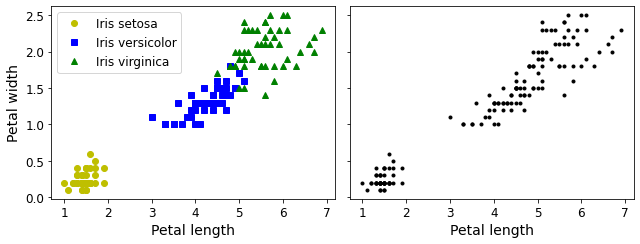

In [4]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classificación_vs_clustering_")
plt.show()

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

Vamos a asignar cada cluster a una clase. En lugar de codificar el mapeo (como se en el codigo claustering_1, para simplificar), escogeremos la clase más común para cada cluster (usando la función `scipy.stats.mode()`):

In [7]:
# Creamos un diccionario con los cluster creados
from scipy import stats

mapping = {}
for class_id in np.unique(y):
    mode, _ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id

mapping

{1: 0, 2: 1, 0: 2}

In [8]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

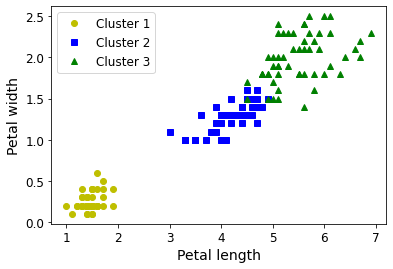

In [9]:
plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [10]:
np.sum(y_pred==y)

145

Observe la cantidad de instancias cuyos clusters coinciden con la clasificación. 
> Esto es solo para propositos ilustrativos!! 

In [11]:
np.sum(y_pred==y) / len(y_pred)

0.9666666666666667

## K-Means

Considere el conjunto de datos sin etiquetar representado en la Figura siguiente: puede ver claramente cinco manchas de instancias. El algoritmo ``K-Means`` es un algoritmo sencillo capaz de agrupar este tipo de datos de forma muy rápida y eficiente, a menudo en unas pocas iteraciones. 


In [12]:
from sklearn.datasets import make_blobs

In [13]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [14]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [15]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

Saving figure blobs_plot


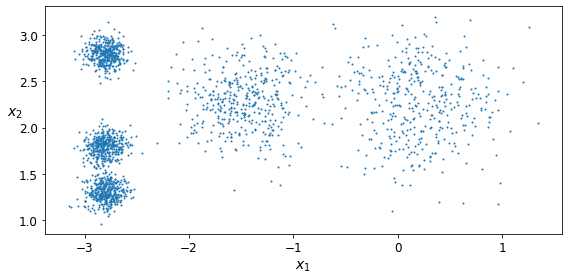

In [16]:
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

**``Fit`` y ``predict``**


Obsérvese que hay que especificar el número de clusters k que el algoritmo debe encontrar. En este ejemplo, es bastante obvio al ver los datos que k debe fijarse en 5, pero en general no es tan fácil. 

Cada instancia fue asignada a uno de los cinco clusters. En el contexto del clustering, la etiqueta de una instancia es el índice del cluster al que esta instancia es asignada por el algoritmo: esto no debe confundirse con las etiquetas de clase en la clasificación (recuerde que el clustering es una tarea de aprendizaje no supervisado). La instancia KMeans conserva una copia de las etiquetas de las instancias con las que fue entrenado, disponible a través de la variable ``labels_``

In [17]:
from sklearn.cluster import KMeans

In [18]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

Cada instancia fue asignada a uno de los 5 clusters:

In [19]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [20]:
y_pred is kmeans.labels_

True

Y se estimaron los siguientes 5 _centroides_ (es decir, centros de cluster):

In [21]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

Tenga en cuenta que la instancia `KMeans` conserva las etiquetas de las instancias con las que fue entrenada. De forma algo confusa, en este contexto, la ``label_``  de una instancia es el índice del clúster al que se asigna esa instancia:

In [22]:
kmeans.labels_

array([4, 0, 1, ..., 2, 1, 0])

Por supuesto, podemos predecir las etiquetas de las nuevas instancias:

In [23]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

##  Límites de la decisión (fronteras creadas por el K-means)

Vamos a trazar los límites de decisión del modelo. Esto nos da un _Diagrama de Voronoi_:


In [24]:
# Estas son funciones para poder visualizar los centroides y los limites

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


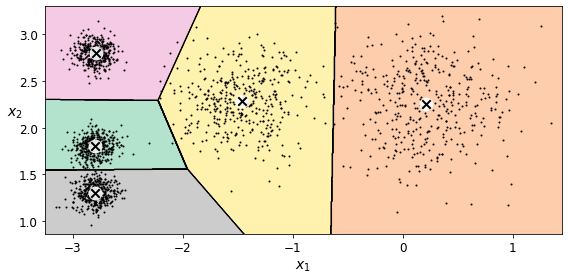

In [25]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
save_fig("voronoi_plot")
plt.show()


La gran mayoría de las instancias se asignaron claramente al clúster apropiado, pero unas pocas instancias fueron probablemente mal etiquetadas (especialmente cerca del límite entre el clúster superior izquierdo y el clúster central). De hecho, el algoritmo K-Means no se comporta muy bien cuando las manchas tienen diámetros muy diferentes, porque lo único que le importa al asignar una instancia a un clúster es la distancia al centroide.


## Hard Clustering _vs_ Soft Clustering

En lugar de asignar cada instancia a un único cluster, lo que se denomina clustering duro, puede ser útil dar a cada instancia una puntuación por cluster, lo que se denomina clustering blando. La puntuación puede ser la distancia entre la instancia y el centroide; a la inversa, puede ser una puntuación de similitud (o afinidad), como la función de base radial gaussiana. En la clase ``KMeans``, el método ``transform()`` mide la distancia de cada instancia a cada centroide:



In [26]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

Puede comprobar que se trata efectivamente de la distancia euclidiana entre cada instancia y cada centroide:

In [27]:
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2) - kmeans.cluster_centers_, axis=2)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### El algoritmo K-Means

El algoritmo K-Means es uno de los algoritmos de agrupación más rápidos, y también uno de los más sencillos:
* Primero se inicializan $k$ centroides al azar: se eligen $k$ instancias distintas al azar del conjunto de datos y se colocan los centroides en sus ubicaciones.
* Se repite hasta la convergencia (es decir, hasta que los centroides dejen de moverse):
    * Asignar cada instancia al centroide más cercano.
    * Actualizar los centroides para que sean la media de las instancias asignadas a ellos.
    



La clase `KMeans` aplica un algoritmo optimizado por defecto. Para obtener el algoritmo original de K-Means (sólo con fines educativos), debe establecer `init="random"`, `n_init=1` y `algorithm="full"`. Estos hiperparámetros se explican a continuación.

Vamos a ejecutar el algoritmo K-Means durante 1, 2 y 3 iteraciones, para ver cómo se mueven los centroides:

In [28]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=0)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=0)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=0)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

Y vamos a graficar los diferentes modelos:

Saving figure kmeans_algorithm_plot


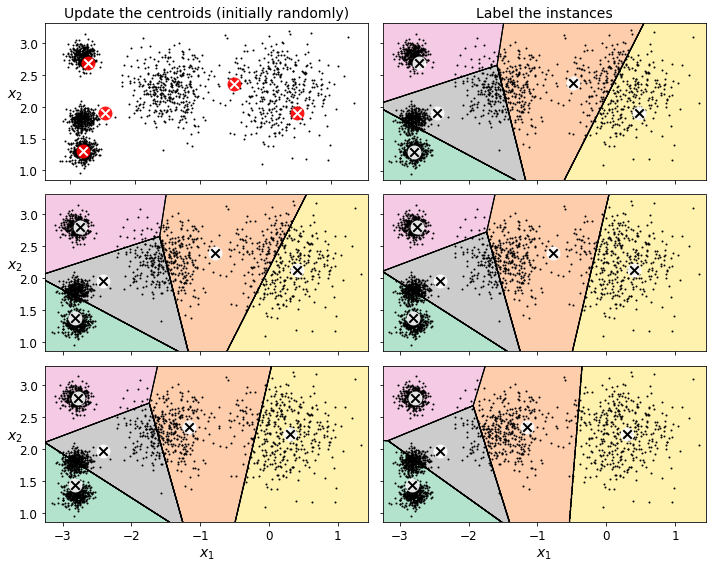

In [29]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

save_fig("kmeans_algorithm_plot")
plt.show()

La complejidad computacional del algoritmo es generalmente lineal con respecto al número de instancias $m$, el número de clusters $k$ y el número de dimensiones $n$.
> K-Means suele ser uno de los algoritmos de clustering más rápidos.

## La variabilidad del algorimo K-Means

En el algoritmo original de K-Means, los centroides se inicializan aleatoriamente y el algoritmo simplemente ejecuta una única iteración para mejorar gradualmente los centroides, como hemos visto anteriormente.

Sin embargo, un problema importante de este enfoque es que si se ejecuta ``K-Means`` varias veces (o con diferentes semillas aleatorias), puede converger a soluciones muy diferentes, como se puede ver a continuación:

In [30]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

Saving figure kmeans_variability_plot


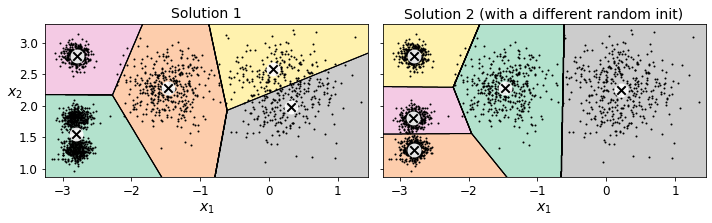

In [36]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=2)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="full", random_state=5)


plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

save_fig("kmeans_variability_plot")
plt.show()


Aunque se garantiza que el algoritmo converge, puede no converger a la solución correcta (es decir, puede converger a un óptimo local): que lo haga o no depende de la inicialización del centroide. La Figura anteriro  muestra dos soluciones subóptimas a las que puede converger el algoritmo si no tiene suerte con el paso de inicialización aleatorio.

### Inercia

Una solución es ejecutar el algoritmo varias veces con diferentes inicializaciones aleatorias y quedarse con la mejor solución. El número de inicializaciones aleatorias se controla con el hiperparámetro ``n_init``, por defecto, es igual a 10, lo que significa que todo el algoritmo descrito anteriormente se ejecuta 10 veces cuando se llama a fit(), y Scikit-Learn se queda con la mejor solución. 

**¿Pero cómo sabe exactamente cuál es la mejor solución?**

Utiliza una métrica de rendimiento. Esa métrica se llama *inercia del modelo*, que es la distancia media al cuadrado entre cada instancia y su centroide más cercano.

Un ejemplo de este cálculo es :  

$$ \sum_{P_i \in C_1}  distance(P_i, C_1)^2 + \sum_{P_i \in C_2}  distance(P_i, C_2)^2 + \sum_{P_i \in C_3} distance(P_i, C_3)^2$$

Donde 
- $C_1, C_2, C_3$ son los centroides 
- $P_i$s son los puntos dentro del cluster
- $distance$ es la distancia Euclidean distance. 

Es aproximadamente igual a 223,3 para el modelo de la izquierda en la Figura izquierda anterior, 237,5 para el modelo de la derecha de esa misma figura.

La clase ``KMeans`` ejecuta el algoritmo ``n_init`` veces y se queda con el modelo de menor inercia. Si tiene curiosidad, la inercia de un modelo es accesible a través de la variable de instancia ``inertia_``:

In [32]:
kmeans.inertia_

211.5985372581683

Como se puede comprobar fácilmente, la inercia es la suma de las distancias al cuadrado entre cada instancia de entrenamiento y su centroide más cercano:

In [33]:
X_dist = kmeans.transform(X)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

211.59853725816834

El método `score()` devuelve la inercia negativa. ¿Por qué negativa? Pues porque el método `score()` de un predictor debe respetar siempre la regla "_más grande es mejor_".

In [34]:
kmeans.score(X)

-211.5985372581683

### Multiples Inicializaciones

Un enfoque para resolver el problema de la variabilidad es simplemente ejecutar el algoritmo K-Means varias veces con diferentes inicializaciones aleatorias, y seleccionar la solución que minimiza la inercia. Por ejemplo, aquí están las inercias de los dos modelos "malos" mostrados en la figura anterior:

In [37]:
kmeans_rnd_init1.inertia_

219.43539442771404

In [38]:
kmeans_rnd_init2.inertia_

211.5985372581683

Como puedes ver, tienen una inercia más alta que el primer modelo "bueno" que entrenamos, lo que significa que probablemente son peores.

Cuando se establece el hiperparámetro `n_init`, Scikit-Learn ejecuta el algoritmo original `n_init` veces, y selecciona la solución que minimiza la inercia. Por defecto, Scikit-Learn establece `n_init=10`.


In [ ]:
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                              algorithm="full", random_state=2)
kmeans_rnd_10_inits.fit(X)

Como se puede ver, terminamos con el modelo inicial, que es ciertamente la solución óptima de K-Means (al menos en términos de inercia, y asumiendo $k=5$).

In [ ]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

### Métodos de inicialización del centroide K-Means++

En lugar de inicializar los centroides de forma totalmente aleatoria, es preferible inicializarlos utilizando el siguiente algoritmo, propuesto en un documento de 2006 (https://goo.gl/eNUPw6) por David Arthur y Sergei Vassilvitskii ``K-Means++``:
* Tomar un centroide $c_1$, elegido uniformemente al azar del conjunto de datos.
* Tomar un nuevo centro $c_i$, eligiendo una instancia $\mathbf{x}_i$ con probabilidad $D(\mathbf{x}_i)^2/\sum\limits_{j=1}^{{m}{D(\mathbf{x}_j)}^2$ donde $D(\mathbf{x}_i)$ es la distancia entre la instancia $\mathbf{x}_i$ y el centroide más cercano que ya fue elegido. Esta distribución de probabilidad asegura que las instancias que están más lejos de los centroides ya elegidos tienen muchas más probabilidades de ser seleccionadas como centroides.
* Repetir el paso anterior hasta que se hayan elegido todos los centroides $k$.


El resto del algoritmo K-Means++ es simplemente un K-Means normal. Con esta inicialización, es mucho menos probable que el algoritmo K-Means converja a una solución subóptima, por lo que es posible reducir `n_init` considerablemente. La mayoría de las veces, esto compensa en gran medida la complejidad adicional del proceso de inicialización.

Para establecer la inicialización a K-Means++, simplemente establezca `init="k-means++"` (en realidad es el valor por defecto):

In [ ]:
# Consulte en la ayuda
# ?KMeans()

In [ ]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

### K-Means acelerado

El algoritmo K-Means puede acelerarse significativamente si se evitan muchos cálculos de distancia innecesarios: esto se consigue explotando la desigualdad del triángulo (dados tres puntos A, B y C, la distancia AC es siempre tal que AC ≤ AB + BC) y llevando la cuenta de los límites inferiores y superiores de las distancias entre las instancias y los centroides (véase este [documento de 2003](https://www.aaai.org/Papers/ICML/2003/ICML03-022.pdf) de Charles Elkan para más detalles).


Para utilizar la variante de K-Means de Elkan, basta con establecer `algoritmo="elkan"`. Tenga en cuenta que no admite datos dispersos, por lo que, por defecto, Scikit-Learn utiliza `"elkan"` para datos densos, y `"full"` (el algoritmo regular de K-Means) para datos dispersos.

In [ ]:
%timeit -n 50 KMeans(algorithm="elkan", random_state=42).fit(X)

In [ ]:
%timeit -n 50 KMeans(algorithm="full", random_state=42).fit(X)

En este caso no hay gran diferencia, ya que el conjunto de datos es bastante pequeño.

### Mini-Batch K-Means

Otra variante importante del algoritmo K-Means fue propuesta en un artículo de 2010 por David Sculley. En lugar de utilizar el conjunto de datos completo en cada iteración, el algoritmo es capaz de utilizar **minilotes**, moviendo los centroides sólo ligeramente en cada iteración. Esto acelera el algoritmo normalmente por un factor de tres o cuatro y hace posible agrupar conjuntos de datos enormes que no caben en la memoria. Scikit-Learn implementa este algoritmo en la clase MiniBatchKMeans. Puede utilizar esta clase como la clase KMeans.

Scikit-Learn también implementa una variante del algoritmo K-Means que soporta mini-lotes (ver [este documento](http://www.eecs.tufts.edu/~dsculley/papers/fastkmeans.pdf)):

In [ ]:
from sklearn.cluster import MiniBatchKMeans

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

In [ ]:
minibatch_kmeans.inertia_

Si el conjunto de datos no cabe en la memoria, la opción más sencilla es utilizar la clase `memmap`, como haremos con el el PCA incremental en el próximo código. Alternativamente, puede pasar un minilote a la vez al método `partial_fit()`, pero esto requerirá mucho más trabajo, ya que tendrá que realizar múltiples inicializaciones y seleccionar la mejor usted mismo.

Aunque el algoritmo Mini-batch K-Means es mucho más rápido que el algoritmo K-Means normal, su inercia es generalmente un poco peor, especialmente cuando el número de clusters aumenta. Puede ver esto en la Figura de mas abajo: 

* el gráfico de la izquierda compara las inercias de los modelos Mini-batch K-Means y K-Means regular entrenados en el conjunto de datos anterior usando varios números de clusters k. 
* La diferencia entre las dos curvas se mantiene bastante constante, pero esta diferencia se vuelve más y más significativa a medida que k aumenta, ya que la inercia se vuelve más y más pequeña. 
* En el gráfico de la derecha, se puede ver que Mini-batch K-Means es mucho más rápido que K-Means normal, y esta diferencia aumenta con k.

Primero carguemos el MNIST:

**Advertencia:** desde Scikit-Learn 0.24, `fetch_openml()` devuelve un `DataFrame` de Pandas por defecto. Para evitar esto y mantener el mismo código que en el libro, utilizamos `as_frame=False`.

In [ ]:
import urllib.request
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.int64)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    mnist["data"], mnist["target"], random_state=42)

Next, let's write it to a `memmap`:

In [ ]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [ ]:
minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42)
minibatch_kmeans.fit(X_mm)

Si tus datos son tan grandes que no puedes usar `memmap`, las cosas se complican. Empecemos escribiendo una función para cargar el siguiente lote (en la vida real, cargarías los datos desde el disco):

In [ ]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

Ahora podemos entrenar el modelo alimentándolo con un lote cada vez. También tenemos que implementar múltiples inicializaciones y quedarnos con el modelo de menor inercia:

In [ ]:
np.random.seed(42)

In [ ]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  # more data for K-Means++ initialization
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [ ]:
best_kmeans.score(X)

Mini-batch K-Means is much faster than regular K-Means:

In [ ]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)

In [ ]:
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

¡Eso es *mucho* más rápido! Sin embargo, su rendimiento suele ser menor (mayor inercia), y sigue degradándose a medida que _k_ aumenta. Vamos a trazar la relación de inercia y la relación de tiempo de entrenamiento entre Mini-batch K-Means y K-Means regular:

In [ ]:
from timeit import timeit

In [ ]:
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

### Encontrar el número optimo de clusters



¿Qué pasa si el número de clusters se fija en un valor inferior o superior a 5?

In [ ]:
kmeans_k3 = KMeans(n_clusters=3, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, random_state=42)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
save_fig("bad_n_clusters_plot")
plt.show()

estos dos modelos no se ven muy bien. ¿Qué pasa con sus inercias?

In [ ]:
kmeans_k3.inertia_

In [ ]:
kmeans_k8.inertia_

Tal vez piense que podríamos elegir el modelo con la menor inercia, ¿verdad? Por desgracia, no es tan sencillo. La inercia para k=3 es de 653,2, que es mucho mayor que para k=5 (que era de 211,6). Pero con k=8, la inercia es sólo de 119,1. La inercia no es una buena métrica de rendimiento a la hora de elegir k, ya que va disminuyendo a medida que aumentamos k. De hecho, cuantos más clusters haya, más cerca estará cada instancia de su centroide más cercano y, por tanto, menor será la inercia. Vamos a representar la inercia en función de k (véase la figura 9-8).


No, no podemos simplemente tomar el valor de $k$ que minimiza la inercia, ya que ésta sigue siendo menor a medida que aumentamos $k$. En efecto, cuantos más conglomerados haya, más cerca estará cada instancia de su centroide más cercano y, por tanto, menor será la inercia. Sin embargo, podemos representar la inercia en función de $k$ y analizar la curva resultante:

In [ ]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

In [ ]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 8.5, 0, 1300])
save_fig("inertia_vs_k_plot")
plt.show()

Como se puede ver, hay un codo en $k=4$, lo que significa que menos racimos que eso sería malo, y más racimos no ayudarían mucho y podrían cortar los racimos a la mitad. Así que $k=4$ es una opción bastante buena. Por supuesto, en este ejemplo no es perfecto, ya que significa que las dos manchas de la parte inferior izquierda se considerarán como un solo clúster, pero, no obstante, es una agrupación bastante buena.

In [ ]:
plot_decision_boundaries(kmeans_per_k[4-1], X)
plt.show()

Otro enfoque es mirar la _puntuación de la silueta_, que es la media del _coeficiente de la silueta_ sobre todas las instancias. El coeficiente de silueta de una instancia es igual a 

$(b - a)/\Nmáx(a, b)$ 

donde $a$ es la distancia media a las otras instancias del mismo cluster (es la _distancia media intra-cluster_), y $b$ es la _distancia media al cluster más cercano_, es decir, la distancia media a las instancias del siguiente cluster más cercano (definido como el que minimiza $b$, excluyendo el propio cluster de la instancia). El coeficiente de silueta puede variar entre -1 y +1: un coeficiente cercano a +1 significa que la instancia está bien dentro de su propio cluster y lejos de otros clusters, mientras que un coeficiente cercano a 0 significa que está cerca del límite de un cluster, y finalmente un coeficiente cercano a -1 significa que la instancia puede haber sido asignada al cluster equivocado.

Vamos a trazar la puntuación de la silueta en función de $k$:

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X, kmeans.labels_)

In [ ]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

Como puede ver, esta visualización es mucho más rica que la anterior: en particular, aunque confirma que $k=4$ es una muy buena elección, también subraya el hecho de que $k=5$ es bastante bueno también.

Una visualización aún más informativa se da cuando se traza el coeficiente de silueta de cada instancia, ordenado por el cluster al que están asignados y por el valor del coeficiente. Esto se denomina _diagrama de siluetas_:

In [ ]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

Como puede ver, $k=5$ parece la mejor opción aquí, ya que todos los clusters tienen aproximadamente el mismo tamaño, y todos cruzan la línea de puntos, que representa la puntuación media de la silueta.

## Las limitaciones del K-Means

A pesar de sus muchos méritos, sobre todo su rapidez y escalabilidad, K-Means no es perfecto. Como hemos visto, es necesario ejecutar el algoritmo varias veces para evitar soluciones subóptimas, además de tener que especificar el número de clusters, lo que puede ser bastante complicado. Además, K-Means no se comporta muy bien cuando los clusters tienen tamaños variables, densidades diferentes o formas no esféricas. Por ejemplo, la Figura a seguir muestra cómo K-Means agrupa un conjunto de datos que contiene tres clusters elipsoidales de diferentes dimensiones, densidades y orientaciones.

In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [ ]:
plot_clusters(X)

In [ ]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

In [ ]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

save_fig("bad_kmeans_plot")
plt.show()

Como puede ver, ninguna de estas soluciones es buena. La solución de la izquierda es mejor, pero sigue cortando el 25% del grupo central y lo asigna al grupo de la derecha. La solución de la derecha es simplemente terrible, aunque su inercia es menor. Así que, dependiendo de los datos, diferentes algoritmos de agrupación pueden funcionar mejor. En este tipo de conglomerados elípticos, los modelos de mezcla gaussiana funcionan muy bien.

> Es importante escalar las características de entrada antes de ejecutar K-Means, o los clusters pueden estar muy estirados y K-Means tendrá un mal rendimiento. Escalar las características no garantiza que todos los clusters sean agradables y esféricos, pero generalmente mejora las cosas.

## Uso de la clusterización para la segmentación de imágenes

La segmentación de imágenes es la tarea de dividir una imagen en múltiples segmentos. En la segmentación semántica, todos los píxeles que forman parte del mismo tipo de objeto se asignan al mismo segmento. Por ejemplo, en el sistema de visión de un coche autoconducido, todos los píxeles que forman parte de la imagen de un peatón podrían asignarse al segmento "peatón" (habría un segmento que contendría todos los peatones). En la segmentación por instancias, todos los píxeles que forman parte del mismo objeto individual se asignan al mismo segmento. En este caso, habría un segmento diferente para cada peatón. El estado del arte en la segmentación semántica o por instancias se consigue hoy en día utilizando arquitecturas complejas basadas en redes neuronales convolucionales. 

Aquí vamos a hacer algo mucho más sencillo: la segmentación por colores. Simplemente asignaremos los píxeles al mismo segmento si tienen un color similar. En algunas aplicaciones, esto puede ser suficiente. Por ejemplo, si quieres analizar imágenes de satélite para medir la superficie total de bosque que hay en una región, la segmentación por colores puede ser suficiente.
Primero, use la función `imread()` de Matplotlib para cargar la imagen (vea la imagen superior izquierda en la Figura abajo):

In [43]:
# cargar imagen ladybug
images_path = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(images_path, exist_ok=True)
filename = "ladybug.png"


In [44]:
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

La imagen se representa como una matriz 3D. El tamaño de la primera dimensión es la altura; la segunda es la anchura; y la tercera es el número de canales de color, en este caso rojo, verde y azul (RGB). En otras palabras, para cada píxel hay un vector 3D que contiene las intensidades de rojo, verde y azul, cada una de ellas entre 0,0 y 1,0 (o entre 0 y 255, si se utiliza
imageio.imread()). Algunas imágenes pueden tener menos canales, como las imágenes en escala de grises (un canal). Y algunas imágenes pueden tener más canales, como las imágenes con un canal alfa adicional para la transparencia o las imágenes de satélite, que a menudo contienen canales para muchas frecuencias de luz (por ejemplo, infrarrojos). El siguiente código reestructura la matriz para obtener una larga lista de colores RGB, y luego agrupa estos colores utilizando K-Means:

In [50]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)


Por ejemplo, puede identificar un grupo de colores para todos los tonos de verde. A continuación, para cada color (por ejemplo, verde oscuro), busca el color medio del grupo de colores del píxel. Por ejemplo, todos los tonos de verde pueden ser sustituidos por el mismo color verde claro (suponiendo que el color medio del clúster verde es verde claro). Por último, da nueva forma a esta larga lista de colores para obtener la misma forma que la imagen original. Y ya está.
Esto produce la imagen mostrada en la parte superior derecha de la Figura de abajo. Puede experimentar con varios números de clusters, como se muestra en la figura. Si utiliza menos de ocho clusters, observe que el llamativo color rojo de la mariquita no consigue un cluster propio: se fusiona con los colores del entorno. Esto se debe a que K-Means prefiere clusters de tamaños similares. La mariquita es pequeña, mucho más pequeña que el resto de la imagen, así que aunque su color es llamativo, K-Means no le dedica un grupo.

In [51]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Saving figure image_segmentation_diagram


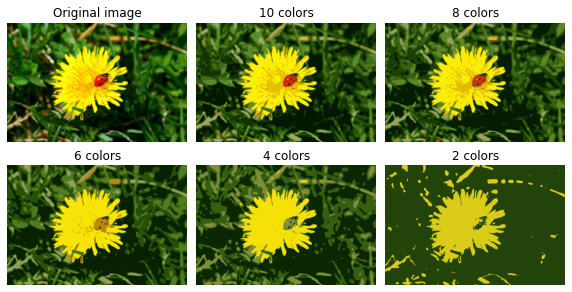

In [52]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

## Uso de Clustering para el preprocesamiento

El clustering puede ser un enfoque eficiente para la reducción de la dimensionalidad, en particular como un paso de preprocesamiento antes de un algoritmo de aprendizaje supervisado. Como ejemplo de uso de la agrupación para la reducción de la dimensionalidad, vamos a abordar el conjunto de datos de dígitos, que es un conjunto de datos simple similar al MNIST que contiene 1.797 imágenes en escala de grises de 8 × 8 que representan los dígitos del 0 al 9. En primer lugar, cargue el conjunto de datos:

In [53]:
from sklearn.datasets import load_digits

In [54]:
X_digits, y_digits = load_digits(return_X_y=True)

Vamos a dividirlo en un conjunto de entrenamiento y un conjunto de prueba:

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

Ahora vamos a ajustar un modelo de regresión logística y a evaluarlo en el conjunto de pruebas:

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

In [59]:
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

Nuestra línea de base: 96,89% de precisión. Veamos si podemos hacerlo mejor utilizando K-Means como paso previo al procesamiento. Crearemos una línea de trabajo que primero agrupará el conjunto de entrenamiento en 50 clusters y reemplazará las imágenes con sus distancias a los 50 clusters, y luego aplicará un modelo de regresión logística:

In [61]:
from sklearn.pipeline import Pipeline

In [62]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [63]:
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

¿Cuánto ha bajado la tasa de error?

In [64]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.28571428571428414

Se ha reducido la tasa de error en más de un 20%. **Pero elegimos el número de clusters $k$ de forma completamente arbitraria**, seguramente podemos hacerlo mejor. 

Dado que K-Means es sólo un paso de preprocesamiento en un proceso de clasificación, encontrar un buen valor para $k$ es mucho más simple que antes: no hay necesidad de realizar un análisis de silueta o minimizar la inercia, el mejor valor de $k$ es simplemente el que resulta en el mejor rendimiento de clasificación.

In [65]:
from sklearn.model_selection import GridSearchCV

**Atención**: la siguiente célula puede tardar cerca de 20 minutos en ejecutarse, o más dependiendo de su hardware.

In [ ]:
param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Veamos cuál es el mejor número de grupos:

In [ ]:
grid_clf.best_params_

In [ ]:
grid_clf.score(X_test, y_test)

## Utilización de la agrupación para el aprendizaje semisupervisado

Otro caso de uso de la agrupación es en el aprendizaje semisupervisado, cuando tenemos muchas instancias sin etiquetar y muy pocas etiquetadas.

Veamos el rendimiento de un modelo de regresión logística cuando sólo tenemos 50 instancias etiquetadas:

In [ ]:
n_labeled = 50

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

Es mucho menos que antes, por supuesto. Veamos cómo podemos hacerlo mejor. En primer lugar, agrupemos el conjunto de entrenamiento en 50 clusters, y luego, para cada cluster, encontremos la imagen más cercana al centroide. A estas imágenes las llamaremos imágenes representativas:

In [ ]:
k = 50

In [ ]:
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

Ahora vamos a trazar estas imágenes representativas y a etiquetarlas manualmente:

In [ ]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()

In [ ]:
y_train[representative_digit_idx]

In [ ]:
y_representative_digits = np.array([
    0, 1, 3, 2, 7, 6, 4, 6, 9, 5,
    1, 2, 9, 5, 2, 7, 8, 1, 8, 6,
    3, 2, 5, 4, 5, 4, 0, 3, 2, 6,
    1, 7, 7, 9, 1, 8, 6, 5, 4, 8,
    5, 3, 3, 6, 7, 9, 7, 8, 4, 9])

Ahora tenemos un conjunto de datos con sólo 50 instancias etiquetadas, pero en lugar de ser instancias completamente aleatorias, cada una de ellas es una imagen representativa de su clúster. Veamos si el rendimiento es mejor:

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

Hemos pasado de un 83,3% de precisión a un 91,3%, aunque todavía sólo estamos entrenando el modelo con 50 instancias. Dado que a menudo es costoso y doloroso etiquetar instancias, especialmente cuando tiene que ser hecho manualmente por expertos, es una buena idea hacer que etiqueten instancias representativas en lugar de instancias aleatorias.

Pero quizá podamos ir un paso más allá: ¿y si propagamos las etiquetas a todas las demás instancias del mismo clúster?

In [ ]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

In [ ]:
log_reg.score(X_test, y_test)

Hemos conseguido un pequeño aumento de la precisión. Es mejor que nada, pero probablemente deberíamos haber propagado las etiquetas sólo a las instancias más cercanas al centroide, porque al propagarlas a todo el clúster, seguramente hemos incluido algunos valores atípicos. Vamos a propagar las etiquetas sólo al percentil 75 más cercano al centroide:

In [ ]:
percentile_closest = 75

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

In [ ]:
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [ ]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)

In [ ]:
log_reg.score(X_test, y_test)

Un poco mejor. Con sólo 50 instancias etiquetadas (¡sólo 5 ejemplos por clase de media!), obtuvimos un rendimiento del 92,7%, que se acerca al rendimiento de la regresión logística en el conjunto de datos _digits_ totalmente etiquetados (que fue del 96,9%).

Esto se debe a que las etiquetas propagadas son realmente muy buenas: su precisión es cercana al 96%:

In [ ]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

## DBSCAN

Este algoritmo define los clusters como regiones continuas de alta densidad. El funcionamiento es el siguiente:
* Para cada instancia, el algoritmo cuenta cuántas instancias se encuentran a una pequeña distancia ε (epsilon) de ella. Esta región se denomina vecindad ε de la instancia.
* Si una instancia tiene al menos un mínimo de instancias de muestra en su vecindad ε (incluida ella misma), se considera una instancia central. En otras palabras, las instancias centrales son aquellas que se encuentran en regiones densas.
* Todas las instancias de la vecindad de una instancia central pertenecen al mismo clúster. Esta vecindad puede incluir otras instancias de núcleo; por lo tanto, una larga secuencia de instancias de núcleo vecinas forma un único clúster.
* Cualquier instancia que no sea un núcleo y no tenga uno en su vecindad se considera una anomalía.

Este algoritmo funciona bien si todos los clusters son suficientemente densos y si están bien separados por regiones de baja densidad. La clase DBSCAN de Scikit-Learn es tan sencilla de utilizar como cabría esperar. Vamos a probarlo con la base de datos de las lunas:

In [ ]:
from sklearn.datasets import make_moons

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

Las etiquetas de todas las instancias están ahora disponibles en la variable de instancia labels_:

In [ ]:
dbscan.labels_

Observe que algunas instancias tienen un índice de cluster igual a -1, lo que significa que son consideradas como anomalías por el algoritmo. Los índices de las instancias del núcleo están disponibles en la variable de instancia core_sample_indices_, y las propias instancias del núcleo están disponibles en la variable de instancia components_:

In [ ]:
len(dbscan.core_sample_indices_)

In [ ]:
dbscan.core_sample_indices_[:10]

In [ ]:
dbscan.components_[:3]

In [ ]:
np.unique(dbscan.labels_)

In [ ]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

In [ ]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

Esta agrupación se representa en el gráfico de la izquierda de la Figura abajo. Como puede ver, se identificaron bastantes anomalías, además de siete agrupaciones diferentes. ¡Qué decepción! Afortunadamente, si ampliamos la vecindad de cada instancia aumentando eps a 0,2, obtenemos la agrupación de la derecha, que parece perfecta. Sigamos con este modelo.

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

save_fig("dbscan_plot")
plt.show()


Sorprendentemente, la clase DBSCAN no tiene un método **predict()**, aunque tiene un método **fit_predict()**. En otras palabras, no puede predecir a qué cluster pertenece una nueva instancia. 

Esta decisión de implementación se tomó porque diferentes algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los autores decidieron dejar que el usuario eligiera cuál utilizar. Además, no es difícil de implementar. Por ejemplo, entrenemos un KNeighborsClassifier:

In [ ]:
dbscan = dbscan2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

In [ ]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

In [ ]:
knn.predict_proba(X_new)

Obsérvese que sólo hemos entrenado el clasificador en las instancias del núcleo, pero también podríamos haber optado por entrenarlo en todas las instancias, o en todas menos en las anomalías: esta elección depende de la tarea final.

El límite de decisión se representa en la Figura (las cruces representan las cuatro instancias de X_nuevo). Obsérvese que, como no hay ninguna anomalía en el conjunto de entrenamiento, el clasificador siempre elige un cluster, incluso cuando ese cluster está muy lejos. Es bastante sencillo introducir una distancia máxima, en cuyo caso las dos instancias que están lejos de ambos clusters se clasifican como anomalías. Para ello, se utiliza el método kneighbors() del KNeighborsClassifier. Dado un conjunto de instancias, devuelve las distancias y los índices de los k vecinos más cercanos en el conjunto de entrenamiento (dos matrices, cada una con k columnas):

In [ ]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
save_fig("cluster_classification_plot")
plt.show()

In [ ]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

En resumen, DBSCAN es un algoritmo muy sencillo pero potente, capaz de identificar cualquier número de clusters de cualquier forma. Es robusto ante los valores atípicos y sólo tiene dos hiperparámetros (eps y min/muestras). Sin embargo, si la densidad varía significativamente entre los conglomerados, puede ser imposible que capture todos los conglomerados correctamente. 

> Les recomiendo consultar y probar el DBSCAN jerárquico, [un proyecto en construcción en sklearn](https://www.edlitera.com/)

## Otros algoritmos de Clusterización

### Clustering espectral

Este algoritmo toma una matriz de similitud entre las instancias y crea una incrustación de baja dimensión a partir de ella (es decir, reduce su dimensionalidad), y luego utiliza otro algoritmo de clustering en este espacio de baja dimensión (la implementación de Scikit-Learn utiliza K-Means.)

El clustering espectral puede capturar estructuras de cluster complejas, y también puede utilizarse para cortar gráficos (por ejemplo, para identificar clusters de amigos en una red social). No se adapta bien a un gran número de instancias, y no se comporta bien cuando los clusters tienen tamaños muy diferentes.


In [ ]:
from sklearn.cluster import SpectralClustering

In [ ]:
sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

In [ ]:
sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

In [ ]:
np.percentile(sc1.affinity_matrix_, 95)

In [ ]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', cmap="Paired", alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()


### Clustering aglomerativo

Una ordenación jerárquica de conglomerados se construye de abajo a arriba. Piense en muchas burbujas diminutas que flotan en el agua y que se van uniendo poco a poco hasta formar un gran grupo de burbujas. Del mismo modo, en cada iteración, la agrupación aglomerativa conecta el par de clusters más cercano (empezando por las instancias individuales). 


Si se dibujara un árbol con una rama por cada par de clusters que se fusionan, se obtendría un árbol binario de clusters, donde las hojas son las instancias individuales. Este enfoque se adapta muy bien a un gran número de instancias o clusters. Puede capturar conglomerados de diversas formas, produce un árbol de conglomerados flexible e informativo en lugar de obligarle a elegir una escala de conglomerados concreta, y puede utilizarse con cualquier distancia entre pares. 


Puede escalar muy bien a un gran número de instancias si se proporciona una matriz de conectividad, que es una matriz m × m dispersa que indica qué pares de instancias son vecinos (por ejemplo, devuelta por sklearn.neighbors.kneighbors_graph()). 

> Sin una matriz de conectividad, el algoritmo no se adapta bien a grandes conjuntos de datos.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [ ]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [ ]:
learned_parameters(agg)

In [ ]:
agg.children_

# Gaussian Mixtures

Un modelo de mezcla gaussiana (GMM) es un modelo probabilístico que supone que las instancias se generaron a partir de una mezcla de varias distribuciones gaussianas cuyos parámetros son desconocidos. 

* Todas las instancias generadas a partir de una única distribución gaussiana forman un clúster que suele tener el aspecto de un elipsoide.
Cada clúster puede tener una forma elipsoidal, un tamaño, una densidad y una orientación diferente. 

* Cuando se observa un caso, se sabe que se ha generado a partir de una de las distribuciones gaussianas, pero no se sabe cuál, ni tampoco cuáles son los parámetros de estas distribuciones.

* Hay varias variantes de GMM.

    * En la variante más sencilla, implementada en la clase `GaussianMixture`, hay que conocer de antemano el número $k$ de distribuciones gaussianas. 

* Se supone que el conjunto de datos 𝑋 se ha generado mediante el siguiente proceso probabilístico:

    * Para cada instancia, se elige un cluster al azar entre $k$ clusters. La probabilidad de elegir el cluster $j$ se define por el peso del cluster, $ϕ(j)$. El índice del cluster elegido para la $i^ésima$ instancia se anota $z^(i)$.

    * Si $z^(i)=j$, lo que significa que la instancia $i$ ha sido asignada al $j^ésimo$ clúster, la ubicación $x$ de esta instancia se muestrea aleatoriamente a partir de la distribución gaussiana con media $μ(j)$ y matriz de covarianza $Σ(j)$. Se observa que $x(i) ∼ N (𝛍(j), Σ(j)$

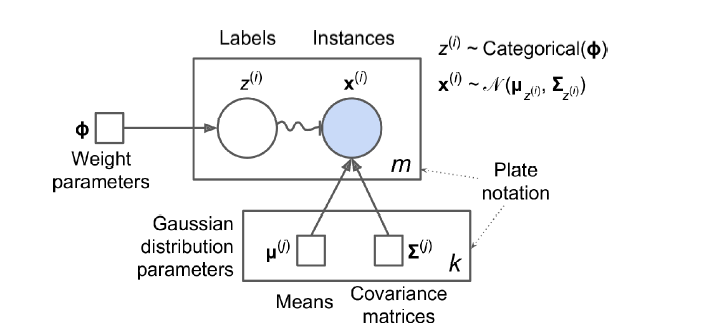

Este proceso generativo puede representarse como un modelo gráfico. La figura de encima representa la estructura de las dependencias condicionales entre las variables aleatorias. A continuación se explica cómo interpretar la figura:

1. Los círculos representan variables aleatorias.
2. Los cuadrados representan valores fijos (es decir, parámetros del modelo).
3. Los rectángulos grandes se llaman placas. Indican que su contenido se repite varias veces.
4. El número que aparece en la parte inferior derecha de cada placa indica cuántas veces se repite su contenido. Así, hay m variables aleatorias $z^{(i)}$ (de $z^{(1)}$ a $z^{(m)}$) y $m$ variables aleatorias $x^{(i)}$ . También hay $k$ medias $μ$ y $k$ matrices de covarianza $Σ$. Por último, sólo hay un vector de pesos $ϕ$ (que contiene todos los pesos $ϕ^{(1)}$ a $ϕ^{(k)}$).
5. Cada variable $z^{(1)}$ se extrae de la distribución categórica con pesos $ϕ$. Cada variable $x^{(i)}$ se extrae de la distribución normal, con la media y la matriz de covarianza definidas por su conglomerado $z^{(1)}$.
6. Las flechas sólidas representan las dependencias condicionales. Por ejemplo, la distribución de probabilidad de cada variable aleatoria z(i) depende del vector de pesos $ϕ$. Nótese que cuando una flecha cruza el límite de una placa, significa que se aplica a todas las repeticiones de esa placa. Por ejemplo, el vector de pesos ϕ condiciona las distribuciones de probabilidad de todas las variables aleatorias $x^{(1)}$ a $x^{(m)}$.
6. La flecha serpenteante que va de $z^{(i)}$ a $x^{(i)}$ representa un interruptor: dependiendo del valor de  $z^{(i)}$, la instancia $x^{(i)}$ se muestreará a partir de una distribución gaussiana diferente. Por ejemplo, si $z^{(i)}=j$, entonces $x^{(i)} ∼ N (𝛍^{(j)}, Σ^{(j)})$.
7. Los nodos sombreados indican que el valor es conocido. Así, en este caso, sólo las variables aleatorias $x^{(i)}$ tienen valores conocidos: se llaman variables observadas. Las variables aleatorias desconocidas $z$ se denominan variables latentes.


### Entonces, ¿qué se puede hacer con este modelo?

Dado el conjunto de datos $\mathbf{X}$, normalmente se quiere empezar estimando los pesos $ϕ$ y todos los parámetros de distribución $μ^{(1)}$ a $μ^{(k)}$ y $Σ^{(1)}$ a $Σ^{(k)}$. 


In [ ]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

Vamos a entrenar un modelo de mezcla gaussiana en el conjunto de datos anterior:

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

Veamos los parámetros que estimó el algoritmo EM:

In [ ]:
gm.weights_

In [ ]:
gm.means_

In [ ]:
gm.covariances_

¿Convergió realmente el algoritmo?

In [ ]:
gm.converged_

Yes, good. How many iterations did it take?

In [ ]:
gm.n_iter_

Efectivamente, las ponderaciones que se utilizaron para generar los datos fueron 0,2, 0,4 y 0,4; y del mismo modo, las medias y las matrices de covarianza eran muy parecidas a las encontradas por el algoritmo. 

Esta clase se basa en el algoritmo de **Expected-Maximization (EM)**, que tiene muchas similitudes con el algoritmo K-Means: también inicializa los parámetros de los clusters de forma aleatoria, y luego repite dos pasos hasta la convergencia, primero asignando instancias a los clusters (esto se llama el paso de expectativa) y luego actualizando los clusters (esto se llama el paso de maximización). **¿Le resulta familiar, verdad?**

En el contexto del clustering, puedes pensar en EM como una generalización de K-Means que no sólo encuentra los centros de los clusters $(μ^{(1)}$ a $μ^{(k)})$, sino también su tamaño, forma y orientación $(Σ^{(1)}$ a $Σ^{(k)})$, así como sus pesos relativos $(ϕ^{(1)}$ a $ϕ^{(k)})$. Sin embargo, a diferencia de $K-Means$, EM utiliza asignaciones de clústeres suaves, no duras. 

Para cada instancia, durante el paso de expectativa, el algoritmo estima la probabilidad de que pertenezca a cada clúster (basándose en los parámetros de clúster actuales). Luego, durante el paso de maximización, cada cluster se actualiza utilizando todas las instancias del conjunto de datos, con cada instancia ponderada por la probabilidad estimada de que pertenezca a ese cluster. Estas probabilidades se denominan **responsabilidades de los clusters** para las instancias. Durante la etapa de maximización, la actualización de cada cluster se verá afectada principalmente por las instancias de las que es más responsable.

> Desafortunadamente, al igual que $K-Means$, EM puede terminar convergiendo a soluciones pobres, por lo que necesita ser ejecutado varias veces, manteniendo sólo la mejor solución. Por eso fijamos ``n_init`` en 10. Tenga cuidado: por defecto n_init se establece en 1.

Ahora puede utilizar el modelo para predecir a qué cluster pertenece cada instancia (clustering duro) o las probabilidades de que provenga de cada cluster. Para ello, basta con utilizar el método `predict()` o el método `predict_proba()`:

In [ ]:
gm.predict(X)

In [ ]:
gm.predict_proba(X)

Un modelo de mezcla gaussiana es un modelo generativo, lo que significa que puede muestrear nuevas instancias a partir de él (tenga en cuenta que están ordenadas por índice de clúster):

In [ ]:
X_new, y_new = gm.sample(6)
X_new

In [ ]:
y_new

Obsérvese que se muestrean secuencialmente de cada grupo.

También puede estimar el logaritmo de la _función de densidad de probabilidad_ (PDF) en cualquier lugar utilizando el método `score_samples()`:

In [ ]:
gm.score_samples(X)

Comprobemos que la PDF se integra a 1 en todo el espacio. Simplemente tomamos un gran cuadrado alrededor de los clusters, y lo cortamos en una cuadrícula de cuadrados diminutos, luego calculamos la probabilidad aproximada de que las instancias se generen en cada cuadrado diminuto (multiplicando la PDF en una esquina del cuadrado diminuto por el área del cuadrado), y finalmente sumando todas estas probabilidades). El resultado es muy cercano a 1:

In [ ]:
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

Ahora vamos a trazar los límites de decisión resultantes (líneas discontinuas) y los contornos de densidad:

In [ ]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)

save_fig("gaussian_mixtures_plot")
plt.show()

El algoritmo ha encontrado claramente una solución excelente. Por supuesto, le facilitamos la tarea generando los datos mediante un conjunto de distribuciones gaussianas 2D (por desgracia, los datos de la vida real no siempre son tan gaussianos y de baja dimensión). 

También le dimos al algoritmo el número correcto de clusters. Cuando hay muchas dimensiones, o muchos clusters, o pocas instancias, EM puede tener dificultades para converger a la solución óptima. 

Puede ser necesario reducir la dificultad de la tarea limitando el número de parámetros que el algoritmo tiene que aprender. Una forma de hacerlo es limitar el rango de formas y orientaciones que pueden tener los clusters. **Esto se puede conseguir imponiendo restricciones a las matrices de covarianza**. Para ello, establezca el hiperparámetro `covariance_type` a uno de los siguientes valores:

* `"full"` (por defecto): no hay restricciones, todos los clusters pueden tener una forma elipsoidal de cualquier tamaño.
* `"tied"`Todos los conglomerados deben tener la misma forma, que puede ser cualquier elipsoide (es decir, todos comparten la misma matriz de covarianza).
* `"spherical"`: todos los conglomerados deben ser esféricos, pero pueden tener diferentes diámetros (es decir, diferentes varianzas).
* `"diag"`:  los conglomerados pueden tener una forma elipsoidal de cualquier tamaño, pero los ejes del elipsoide deben ser paralelos a los ejes (es decir, las matrices de covarianza deben ser diagonales).


In [ ]:
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

Por defecto, covariance_type es igual a "full", lo que significa que cada cluster puede adoptar cualquier forma, tamaño y orientación (tiene su propia matriz de covarianza sin restricciones). La Figura muestra las soluciones encontradas por el algoritmo EM cuando ``covariance_type`` se ajusta a "tied" o
"spherical.”

In [ ]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)


In [ ]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)

save_fig("covariance_type_plot")
plt.show()

In [ ]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

## Detección de anomalías mediante mezclas gaussianas

Las mezclas gaussianas pueden utilizarse para la _detección de anomalías_: las instancias situadas en regiones de baja densidad pueden considerarse anomalías. Debe definir qué umbral de densidad desea utilizar. Por ejemplo, en una empresa de fabricación que intenta detectar productos defectuosos, la proporción de productos defectuosos suele ser bien conocida. Digamos que es igual al 4%, entonces puede establecer el umbral de densidad para que sea el valor que resulte en tener el 4% de las instancias localizadas en áreas por debajo de ese umbral de densidad:

In [ ]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

In [ ]:
plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)

save_fig("mixture_anomaly_detection_plot")
plt.show()

## Seleccionar el número de clusters

No podemos utilizar la inercia o la puntuación de la silueta porque ambas suponen que los conglomerados son esféricos. En su lugar, podemos intentar encontrar el modelo que minimice un criterio de información teórico, como el criterio de información bayesiano (BIC) o el criterio de información de Akaike (AIC):


${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$ es el número de instancias.
* $p$ es el número de parámetros aprendidos por el modelo.
* $\hat L$ es el valor maximizado de la función de verosimilitud del modelo. Es la probabilidad condicional de los datos observados $\mathbf{X}$, dado el modelo y sus parámetros optimizados.

Tanto el BIC como el AIC penalizan los modelos que tienen más parámetros que aprender (por ejemplo, más conglomerados), y premian los modelos que se ajustan bien a los datos (es decir, los modelos que dan una alta probabilidad a los datos observados).

In [ ]:
gm.bic(X)

In [ ]:
gm.aic(X)

Podríamos calcular el BIC manualmente así:

In [ ]:
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood

In [ ]:
bic, aic

In [ ]:
n_params

Hay un peso por conglomerado, pero la suma debe ser igual a 1, por lo que tenemos un grado de libertad menos, de ahí el -1. Del mismo modo, los grados de libertad para una matriz de covarianza de $n \times n$ no es $n^2$, sino 

$1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$.



Vamos a entrenar modelos de mezcla gaussiana con varios valores de $k$ y a medir su BIC:

In [ ]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]

In [ ]:
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

In [ ]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
save_fig("aic_bic_vs_k_plot")
plt.show()

Busquemos la mejor combinación de valores tanto para el número de clusters como para el hiperparámetro `tipo de covarianza`:

In [ ]:
min_bic = np.infty

for k in range(1, 11):
    for covariance_type in ("full", "tied", "spherical", "diag"):
        bic = GaussianMixture(n_components=k, n_init=10,
                              covariance_type=covariance_type,
                              random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

In [ ]:
best_k

In [ ]:
best_covariance_type

## Bayesian Gaussian Mixture Models

En lugar de buscar manualmente el número óptimo de conglomerados, es posible utilizar en su lugar la clase `BayesianGaussianMixture` que es capaz de dar pesos iguales (o cercanos) a cero a los conglomerados innecesarios. Sólo tiene que establecer el número de componentes a un valor que crea que es mayor que el número óptimo de conglomerados, y el algoritmo eliminará los conglomerados innecesarios automáticamente.

In [ ]:
from sklearn.mixture import BayesianGaussianMixture

In [ ]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)

El algoritmo ha detectado automáticamente que sólo se necesitan 3 componentes:

In [ ]:
np.round(bgm.weights_, 2)

In [ ]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

En este modelo, los parámetros de los clusters (incluyendo los pesos, las medias y las matrices de covarianza) ya no se tratan como parámetros fijos del modelo, sino como variables aleatorias latentes, al igual que las asignaciones de los clusters (ver Figura siguiente). Así que $z$ incluye ahora tanto los parámetros de los clusters como las asignaciones de los mismos

![gaussian.png](attachment:gaussian.png)

El conocimiento previo sobre las variables latentes $z$ puede codificarse en una distribución de probabilidad $p(z)$ denominada a priori. Por ejemplo, podemos tener una creencia a priori de que es probable que los conglomerados sean pocos (baja concentración), o por el contrario, que es probable que sean abundantes (alta concentración). Esta creencia previa sobre el número de conglomerados puede ajustarse mediante el hiperparámetro `peso_concentración_previa`. Si se ajusta a 0,01 o a 10.000 se obtienen agrupaciones muy diferentes (véase la Figura de más abajo). Sin embargo, cuantos más datos tengamos, menos importan los priores. De hecho, para trazar diagramas con diferencias tan grandes, hay que utilizar priores muy fuertes y pocos datos.

In [ ]:
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=0.01, random_state=42)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1,
                                  weight_concentration_prior=10000, random_state=42)
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])

In [ ]:
np.round(bgm_low.weights_, 2)

In [ ]:
np.round(bgm_high.weights_, 2)

In [ ]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

save_fig("mixture_concentration_prior_plot")
plt.show()

> el hecho de que sólo se vean 3 regiones en el gráfico de la derecha aunque haya 4 centroides no es un error. El peso del clúster superior derecho es mucho mayor que el peso del clúster inferior derecho, por lo que la probabilidad de que cualquier punto de esta región pertenezca al clúster superior derecho es mayor que la probabilidad de que pertenezca al clúster inferior derecho.

In [ ]:
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)

In [ ]:
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

In [ ]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

save_fig("moons_vs_bgm_plot")
plt.show()

**No es un buen resultado** en lugar de detectar 2 clusters con forma de luna, el algoritmo detectó 8 clusters elipsoidales. Sin embargo, el gráfico de densidad no se ve tan mal, por lo que podría ser utilizable para la detección de anomalías.

**Función de Verosimilitud**

In [ ]:
from scipy.stats import norm

In [ ]:
xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS)
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])

In [ ]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4.5))

x_idx = 85
s_idx = 30

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

save_fig("likelihood_function_plot")
plt.show()